In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf

## Preparing data

In [2]:
df = yf.download('NVDA','2022-01-01', '2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,298.149994,307.109985,297.850006,301.209991,300.846375,39154700
2022-01-04,302.769989,304.679993,283.489990,292.899994,292.546417,52715400
2022-01-05,289.489990,294.160004,275.329987,276.040009,275.706757,49806400
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.439819,45418600
2022-01-07,281.410004,284.220001,270.570007,272.470001,272.141022,40993900


In [4]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Ploting price chart

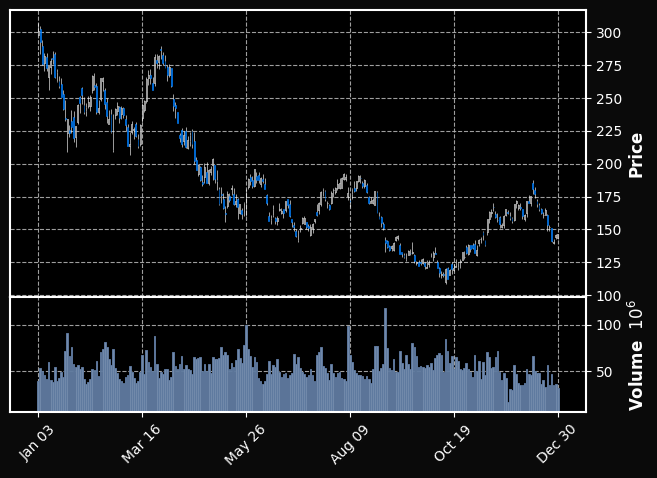

In [5]:
mpf.plot(df, type='candle', style='mike', volume=True)

## Calculating macd

In [6]:
slow_ma=12; fast_ma=26; signal=9; simple_ma=50
df['slow_ma'] = df['Close'].ewm(span=slow_ma).mean()
df['fast_ma'] = df['Close'].ewm(span=fast_ma).mean()
df['macd'] = df['slow_ma'] - df['fast_ma']
df['signal'] = df['macd'].ewm(span=signal).mean()
df['diff'] = df['macd'] - df['signal']
df['simple_ma'] = df['Close'].rolling(window=simple_ma).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,slow_ma,fast_ma,macd,signal,diff,simple_ma
Date,,,,,,,,,,,,
2022-01-03,298.149994,307.109985,297.850006,301.209991,300.846375,39154700,301.209991,301.209991,0.000000,0.000000,0.000000,NaN
2022-01-04,302.769989,304.679993,283.489990,292.899994,292.546417,52715400,296.708743,296.895185,-0.186442,-0.103579,-0.082863,NaN
2022-01-05,289.489990,294.160004,275.329987,276.040009,275.706757,49806400,288.641731,289.402123,-0.760392,-0.372764,-0.387627,NaN
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.439819,45418600,286.475750,287.271310,-0.795560,-0.515988,-0.279572,NaN
2022-01-07,281.410004,284.220001,270.570007,272.470001,272.141022,40993900,282.670438,283.838825,-1.168387,-0.710062,-0.458325,NaN


## Ploting final chart

In [7]:
indicators = [
    mpf.make_addplot((df['simple_ma'])),
    mpf.make_addplot((df['macd']), panel=2),
    mpf.make_addplot((df['signal']), panel=2, color='gray'),
    mpf.make_addplot((df['diff']), type='bar', panel=2, ylabel='MACD', secondary_y=False, color='orange')
]

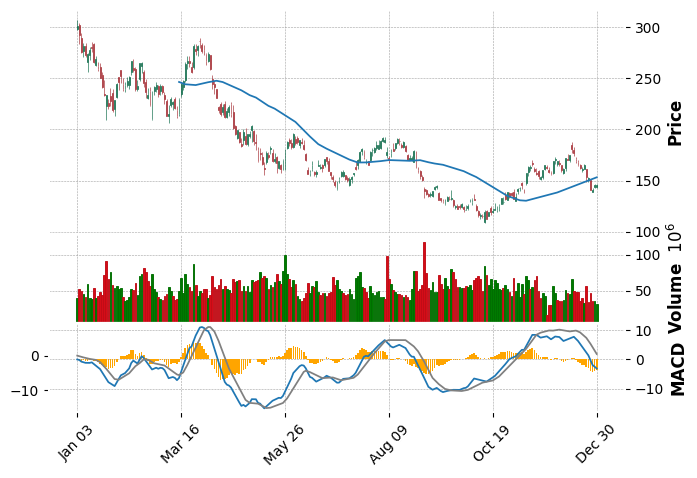

In [8]:
mpf.plot(df, type='candle', style='charles', volume=True, addplot=indicators)